Replogle JM, et al. Mapping information-rich genotype-phenotype landscapes with genome-scale Perturb-seq. Cell. 2022 Jul 7;185(14):2559-2575.e28.

In [3]:
source('./data_processing.R')


In [4]:
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

# Lane_1 Region A

KD6_seq1_essential_sgRNA_Lane_1: sgID_A and sgID_B

In [5]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample1/'
output_dir = './figures_results/Replogle_Cell/sample1'

## UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12528"
[1] "Wildtype UMI: 240156"
[1] "Mutant UMI: 1697572"


Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


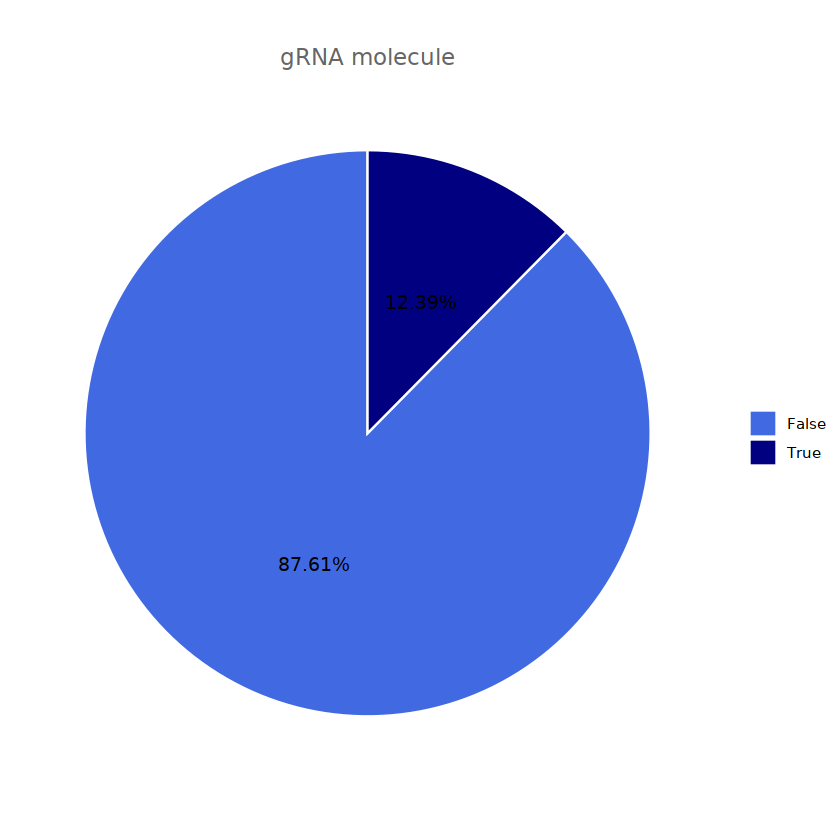

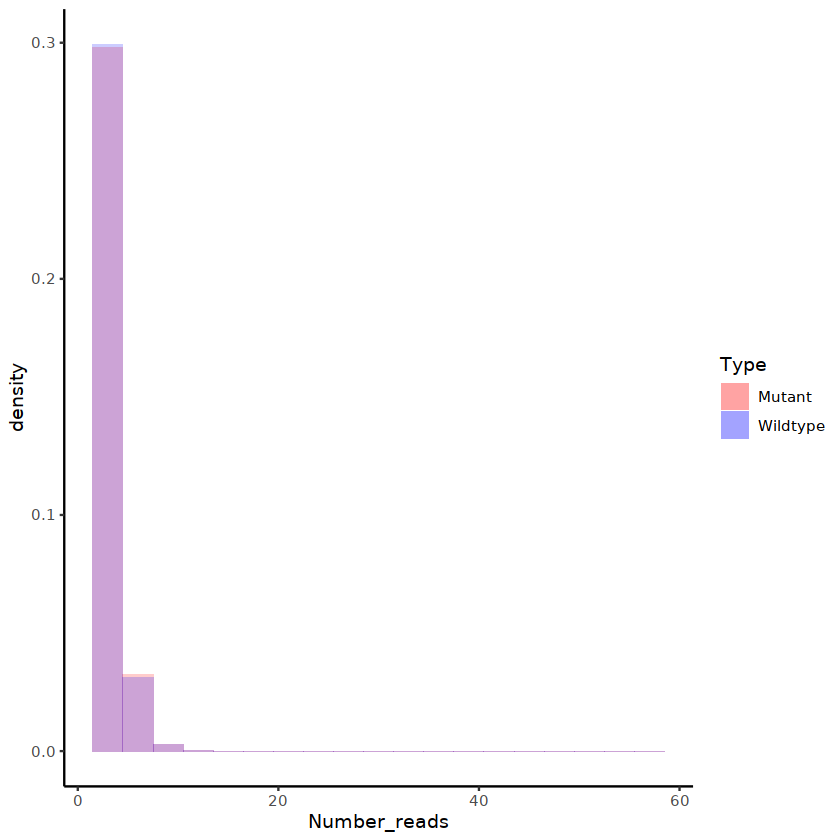

In [6]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


## Correct TSO artifects

In [7]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

[1] 116687

[1] 1821041

False 
6.021846

True 
93.97815

[1] "Number of mutant UMI"
[1] "Processed cell number: 12528"
[1] "Wildtype UMI: 1821041"
[1] "Mutant UMI: 116687"


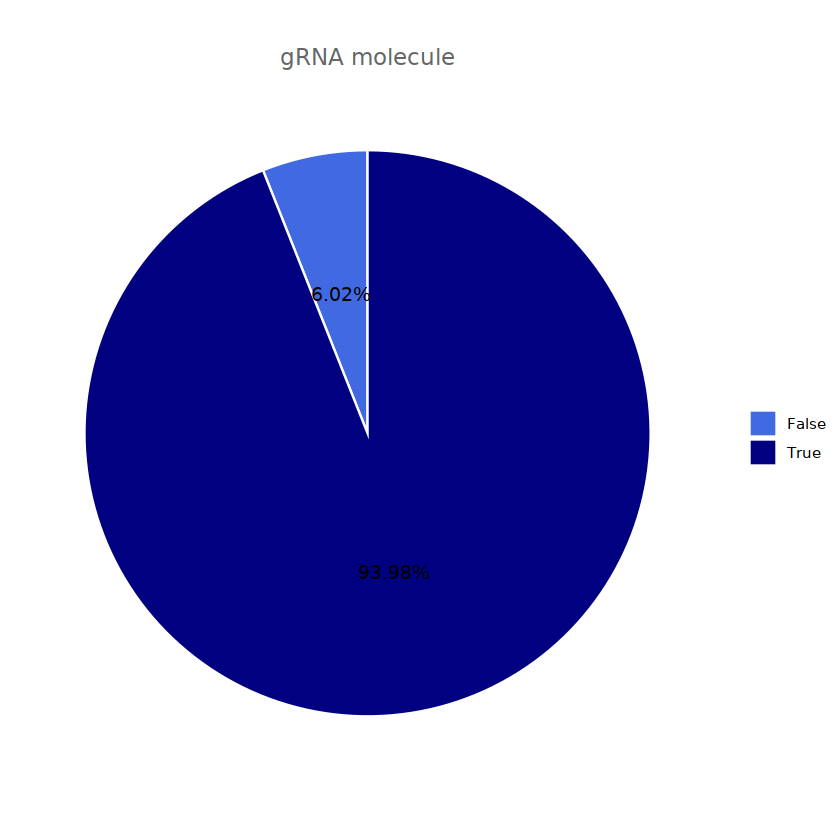

png 
  2

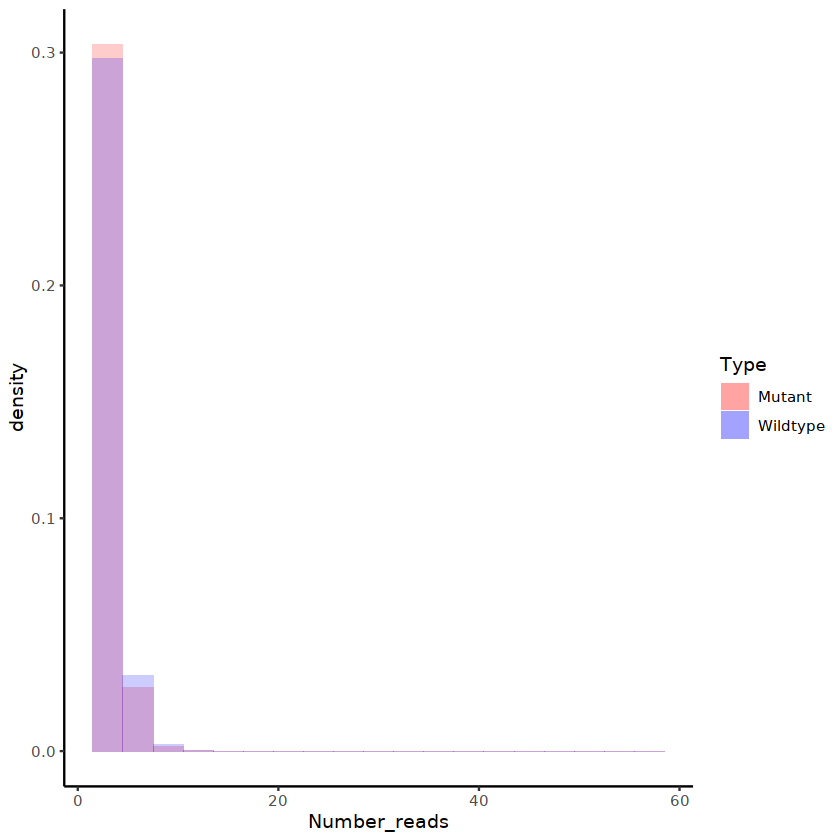

In [8]:
gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


## MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7) 
 1063   647  1539     8     2     6     1   927   604   206    34    16     6 
 D(8)  D(9)     G  I(1)  I(2)  I(3)  I(4)  I(5)  I(8)     T 
    5     3   959  2701  2137   393    17     7     1   927 
[1] "MT mutation type"

   D    I    S 
3357 5256 3596 
[1] "MT mutation structure"

gRNA Rest  TSO 
5657  920 5632 


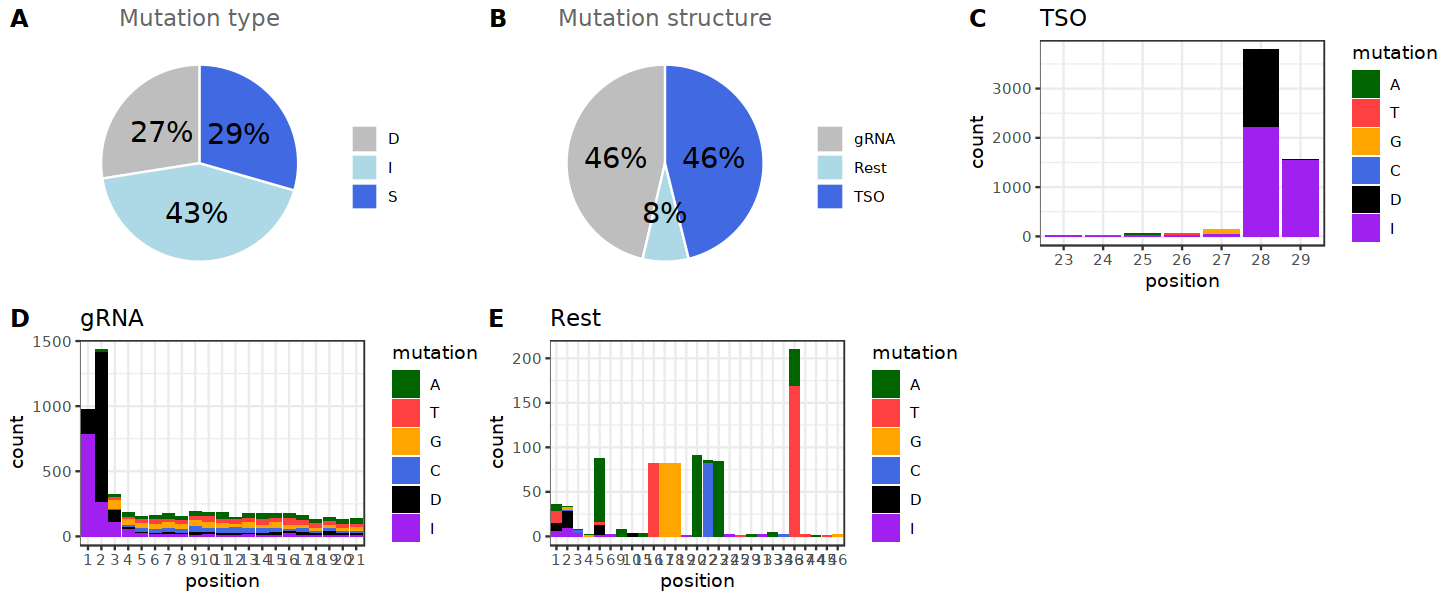

In [12]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [13]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.392   1.000  12.000 

Warning message:
“Removed 216 rows containing non-finite values (`stat_count()`).”


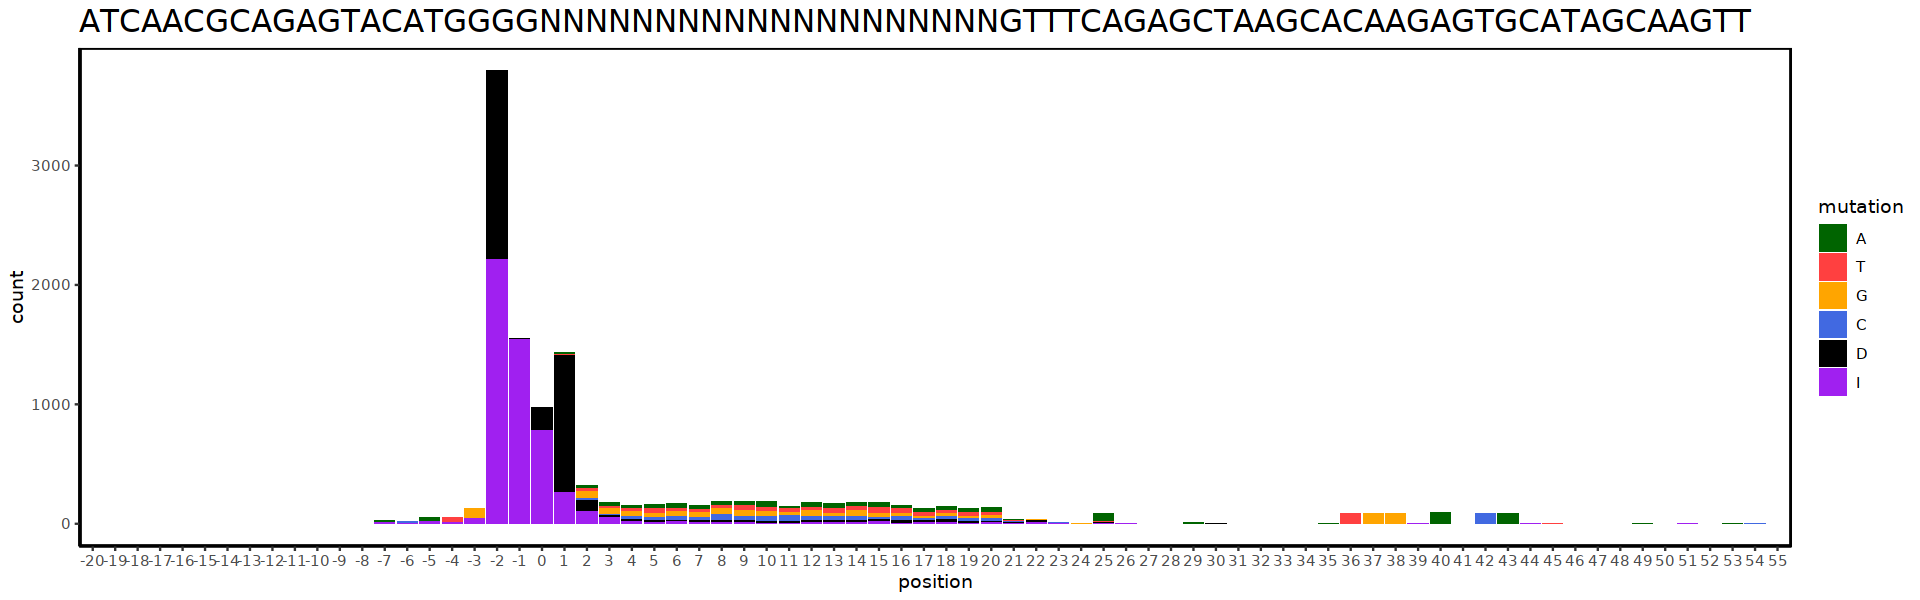

In [14]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
#dev.off()

## correction TSO artifacts 

[1] 1435

Warning message:
“Removed 128 rows containing non-finite values (`stat_count()`).”


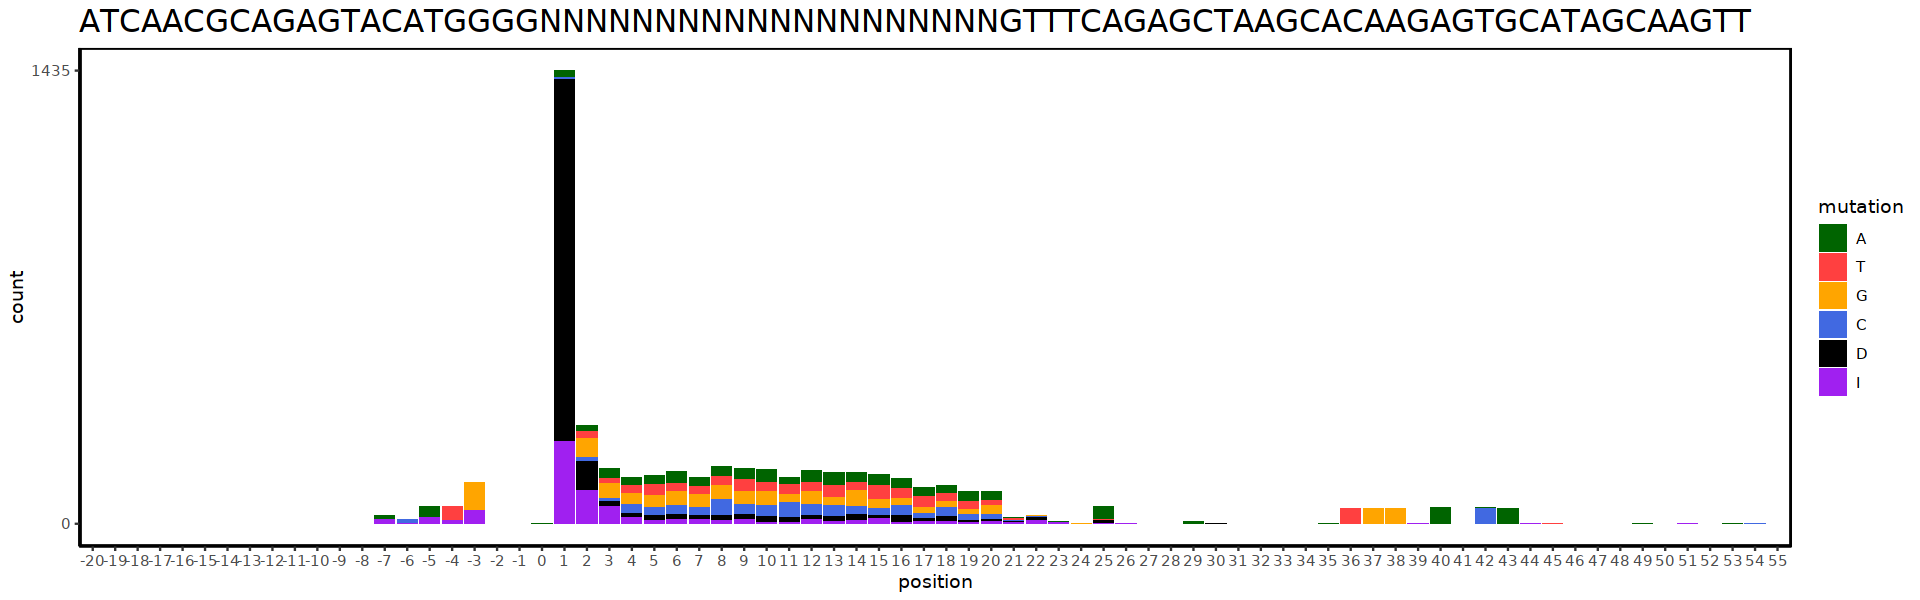

In [15]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)

tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

max(table(MT2$position))
options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')+
scale_y_continuous(breaks = c(0,max(table(MT2$position))))
#dev.off()

In [16]:
head(MT2[which(MT2$position == 1),])

,gene name,structure,structure length,position,mutation,variant number,MT_type,mutation2,dedup
,<chr>,<chr>,<int>,<fct>,<chr>,<chr>,<chr>,<fct>,<chr>
41,4594_LIN54_P2_ENSG00000189308_A_gene,gRNA,21,1,D(2),4594_LIN54_P2_ENSG00000189308_A_gene_variant_5,D,D,4594_LIN54_P2_ENSG00000189308_A_genegRNA211D(2)
43,7833_SF3A2_P1_ENSG00000104897_A_gene,gRNA,21,1,D(2),7833_SF3A2_P1_ENSG00000104897_A_gene_variant_1,D,D,7833_SF3A2_P1_ENSG00000104897_A_genegRNA211D(2)
47,6006_OXA1L_P1P2_ENSG00000155463_A_gene,gRNA,21,1,D(2),6006_OXA1L_P1P2_ENSG00000155463_A_gene_variant_2,D,D,6006_OXA1L_P1P2_ENSG00000155463_A_genegRNA211D(2)
51,3471_GOLT1B_P1P2_ENSG00000111711_A_gene,gRNA,21,1,D(2),3471_GOLT1B_P1P2_ENSG00000111711_A_gene_variant_4,D,D,3471_GOLT1B_P1P2_ENSG00000111711_A_genegRNA211D(2)
57,5551_NDUFB10_P1P2_ENSG00000140990_A_gene,gRNA,21,1,D(3),5551_NDUFB10_P1P2_ENSG00000140990_A_gene_variant_2,D,D,5551_NDUFB10_P1P2_ENSG00000140990_A_genegRNA211D(3)
59,5551_NDUFB10_P1P2_ENSG00000140990_A_gene,gRNA,21,1,D(2),5551_NDUFB10_P1P2_ENSG00000140990_A_gene_variant_9,D,D,5551_NDUFB10_P1P2_ENSG00000140990_A_genegRNA211D(2)


Caused by many sgRNAs with multiple G, then it will cause deletions when bind together with TSO

## Remove TSO artifacts for cell-gRNA assignment


Correct TSO in cells.gRNA.txt regionA

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7) 
 1063   647  1539     8     2     6     1   927   604   206    34    16     6 
 D(8)  D(9)     G  I(1)  I(2)  I(3)  I(4)  I(5)  I(8)     T 
    5     3   959  2701  2137   393    17     7     1   927 
[1] "MT mutation type"

   D    I    S 
3357 5256 3596 
[1] "MT mutation structure"

gRNA Rest  TSO 
5657  920 5632 


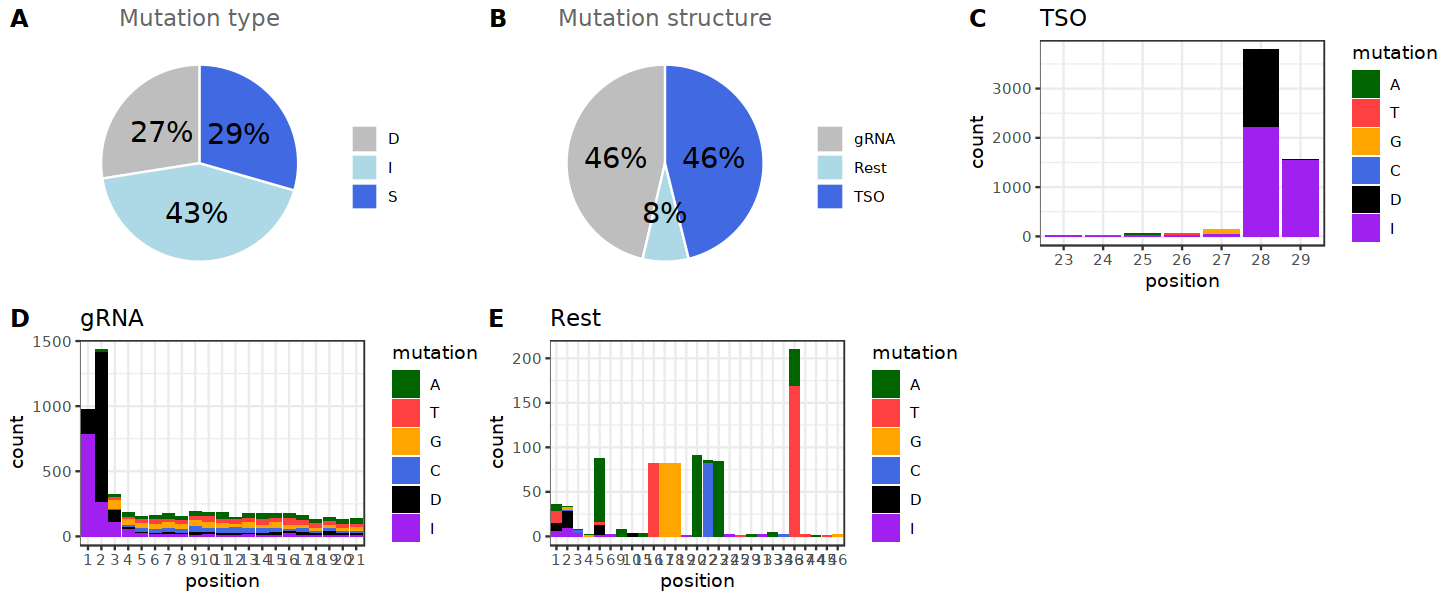

In [16]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample1/'
output_dir = './figures_results/Replogle_Cell/sample1'
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
MT2_nodedup <- MT2
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))

In [17]:
#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts without dedup
MT2_list_nodedup <- unique(MT2_nodedup$`variant number`)
length(MT2_list_nodedup)

[1] 2925

In [18]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA

In [21]:
cells.gRNA <- cells.gRNA.ori
cells.gRNA.WTcounts <- cells.gRNA[,1:5]
for(i in seq(6,n_col-2,2)){
    MT.df <- cells.gRNA[,i:(i+1)]
    colnames(MT.df) <- c('MT','num_UMI_MT')
    MT.notInlist <- MT.df[!MT.df$MT %in% MT2_list_nodedup,]
    index <- !MT.df$MT %in% MT2_list_nodedup
    MT.notInlist$num_UMI_MT[is.na(MT.notInlist$num_UMI_MT)] <- 0
    cells.gRNA.WTcounts$num_UMI_WT[index] <- cells.gRNA.WTcounts$num_UMI_WT[index] + MT.notInlist$num_UMI_MT
    cells.gRNA[index,i:(i+1)] <- NA # make MT not in list as NA
}
cells.gRNA[,1:5] <- cells.gRNA.WTcounts
for(i in seq(1, nrow(cells.gRNA))){
    num_MT <- (sum(!is.na(cells.gRNA[i,])) - 5)/2 #updated number of gRNA
    if(cells.gRNA[i,5] > 0){
        cells.gRNA$feature_order[i] <- num_MT + 1
    }else{
        cells.gRNA$feature_order[i] <- num_MT
    }
}
# now feature order is no longer accumulated 
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = sum(feature_order))
#cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(is_MT))
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(contain_MT, is_MT))

# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


In [22]:
table(cells.num_features$num_features) 
sum(table(cells.num_features$num_features))



   1    2    3    4    5    6    7    8    9   15 
5407 3052 1004  379  137   60   21   13    4    1 

[1] 10078

In [23]:
sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
tmp <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0))
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
sum(cells.gRNA[which(cells.gRNA$num_UMI_WT > 0),'feature_order']-1) + sum(cells.gRNA[which(cells.gRNA$num_UMI_WT == 0),'feature_order'])
# cells with mutations (multiplets count as multiple)

[1] 17386

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


[1] 5643

In [24]:
cells.gRNA_A <- cells.gRNA
cells.num_features_A <- cells.num_features
cells.has_MT_A <- cells.has_MT

In [25]:
sum(cells.has_MT_A$has_MT)
sum(cells.has_MT_A[which(cells.has_MT_A$cb %in% cells.num_features_A[which(cells.num_features_A$num_features == 1),]$cb),]$has_MT)


[1] 3932

[1] 98

In [26]:
length(unique(cells.gRNA_A[which(cells.gRNA_A$feature_order > 1 & cells.gRNA_A$num_UMI_WT > 0),'cb']))
       # contain both WT and MT of the same gRNA


[1] 3401

Rows: 12659 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


png 
  2

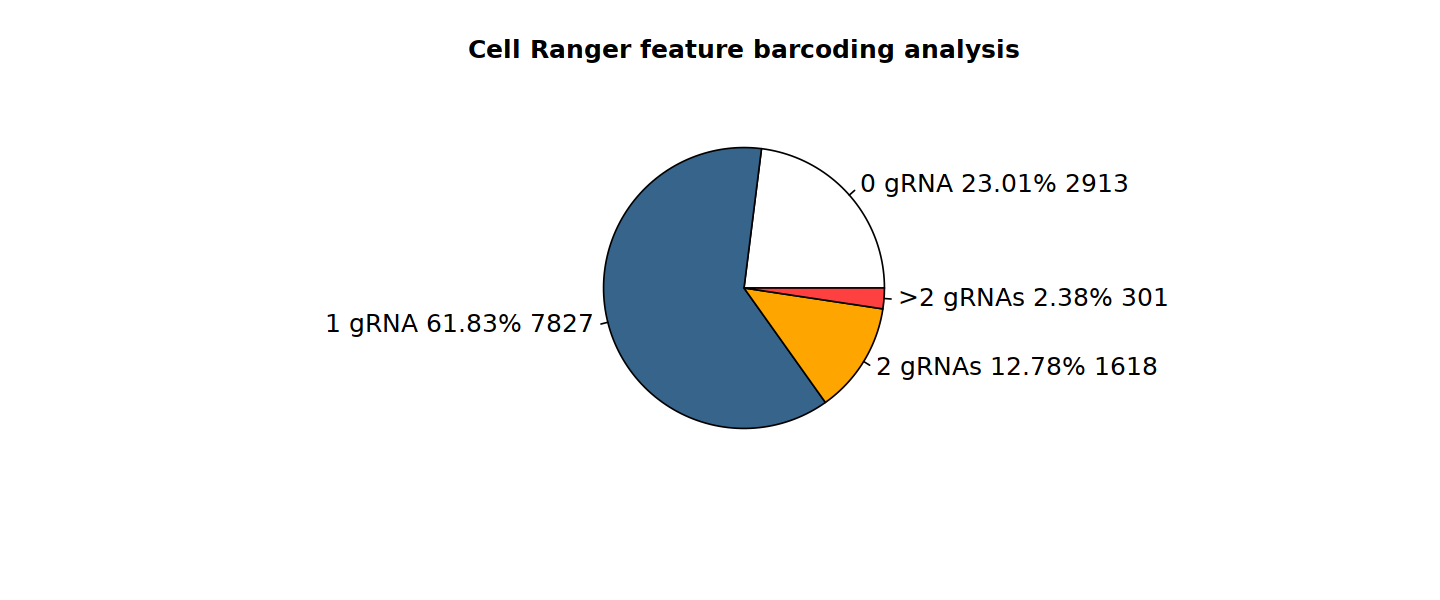

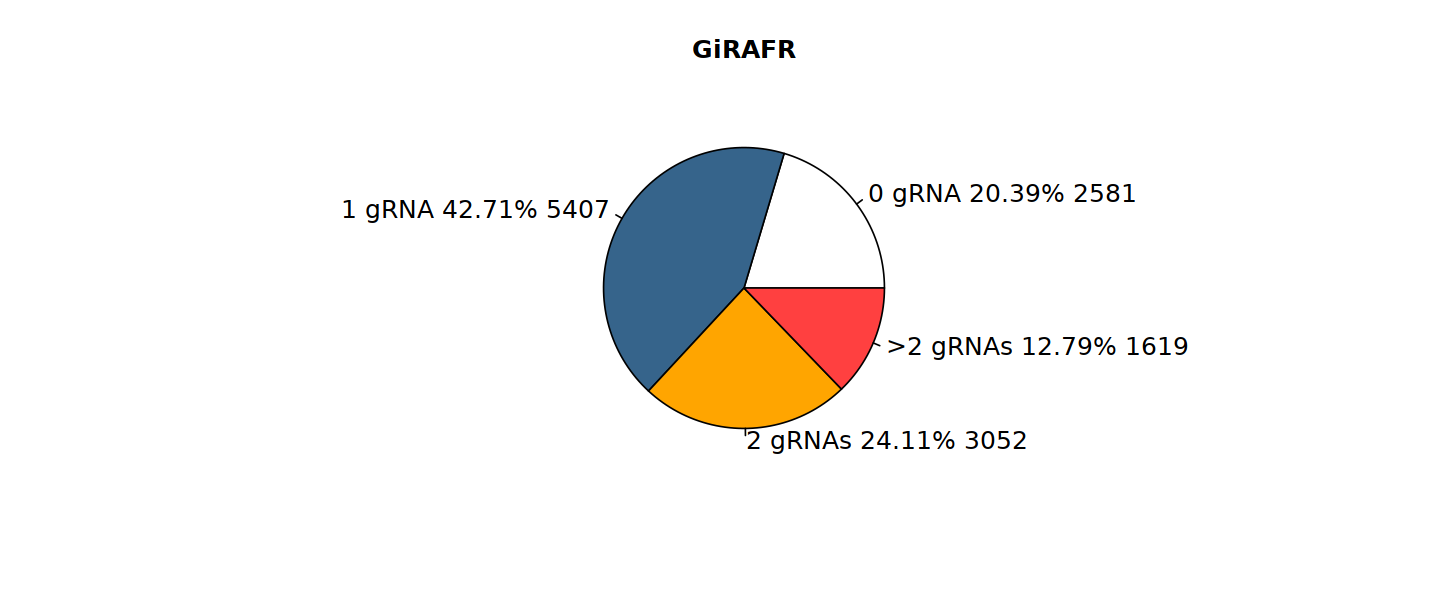

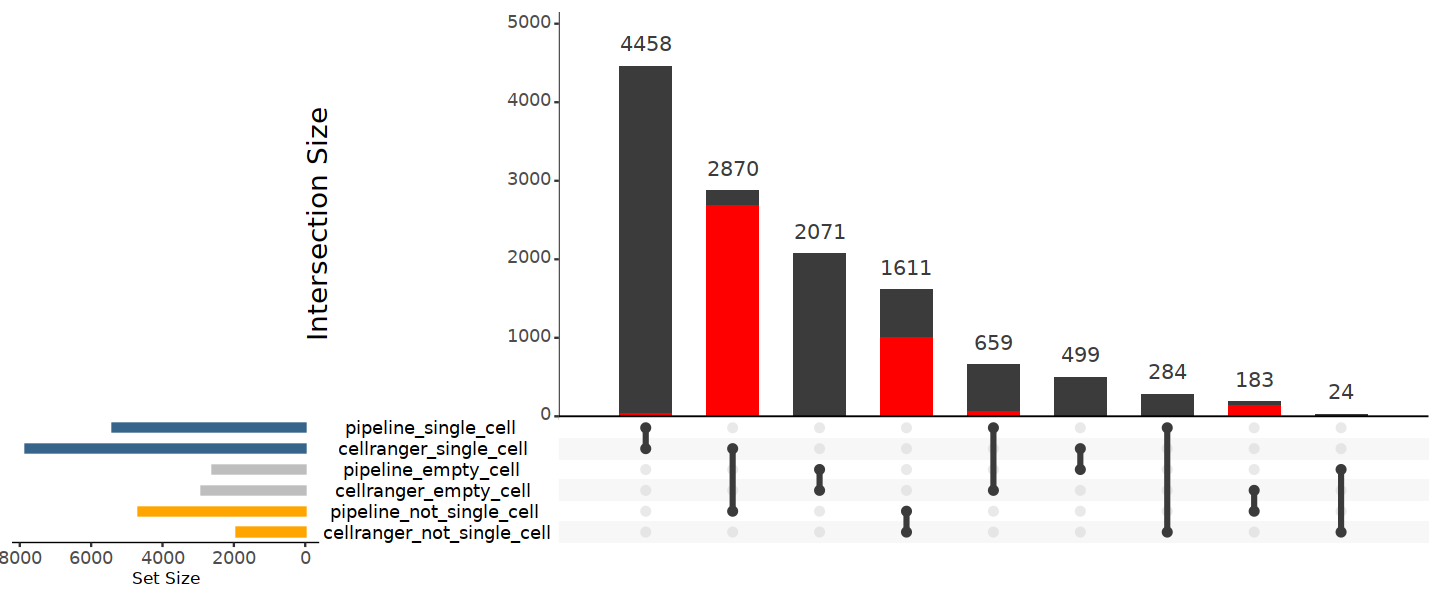

In [27]:
protospacer_file <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/regionA/outs/crispr_analysis/protospacer_calls_per_cell.csv'
barcodes_file <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/regionA/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)

save_pdf <- paste0(output_dir, '.compare_cell_number_TSO.pdf')
pdf(save_pdf, height = 8, width = 10)


pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)

#table(all_barcodes$pipeline_single_cell, all_barcodes$has_MT)
#table(all_barcodes$has_MT)

Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))
print(p)

dev.off()
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')
p

In [28]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  643   199 

# Lane_1 Region B

KD6_seq1_essential_sgRNA_Lane_1: sgID_A and sgID_B

In [29]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample2/'
output_dir = './figures_results/Replogle_Cell/sample2'

## UMI mutation

[1] "Number of mutant UMI"
[1] "Processed cell number: 12151"
[1] "Wildtype UMI: 269303"
[1] "Mutant UMI: 554321"


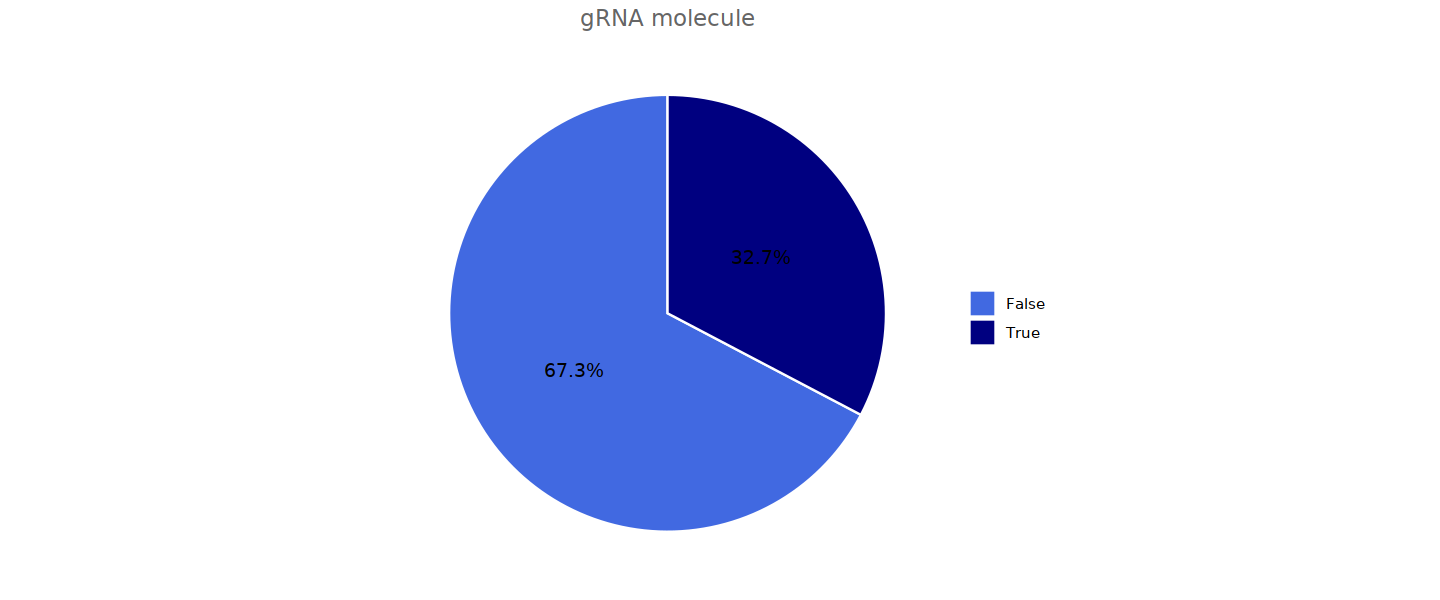

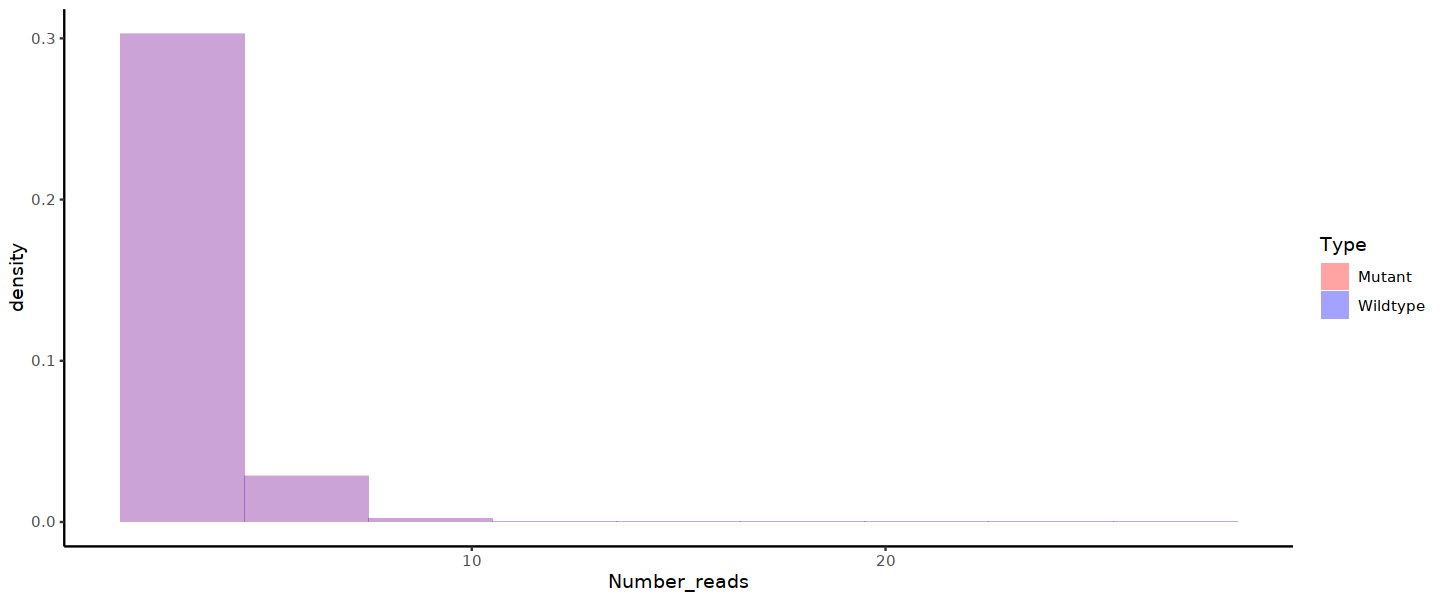

In [30]:
gRNA_UMI_variant <- process_gRNA_UMI_variant(input_dir, output_dir)


## Correct TSO artifects

In [31]:
tmp <- gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False' 
                            & !grepl('TSO',gRNA_UMI_variant$Mutation)),]
index <- which(gRNA_UMI_variant$Type == 'False' & !grepl('TSO',gRNA_UMI_variant$Mutation))
index <- index[!grepl('gRNA:0', tmp$Mutation)]
tmp <- tmp[!grepl('gRNA:0', tmp$Mutation),]
nrow(tmp) # Real Mutant UMIs
nrow(gRNA_UMI_variant) - nrow(tmp) # wildtype UMIs

[1] 70255

[1] 753369

False 
8.529985

True 
91.47002

[1] "Number of mutant UMI"
[1] "Processed cell number: 12151"
[1] "Wildtype UMI: 753369"
[1] "Mutant UMI: 70255"


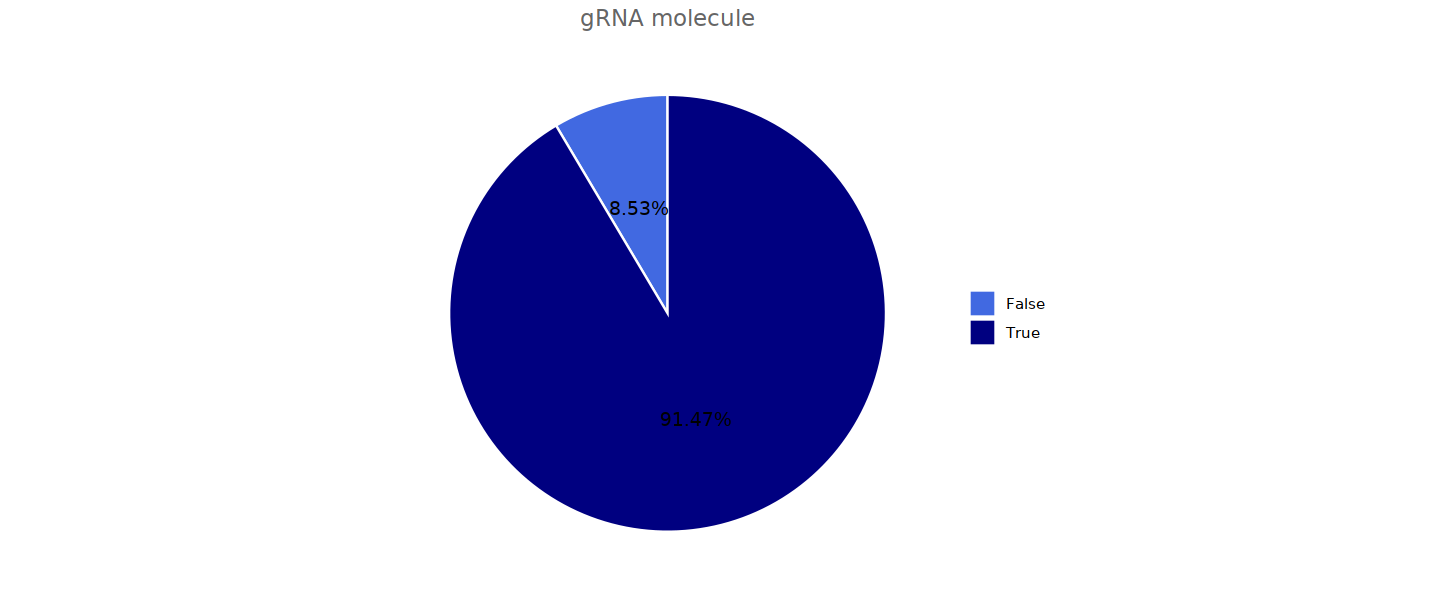

png 
  2

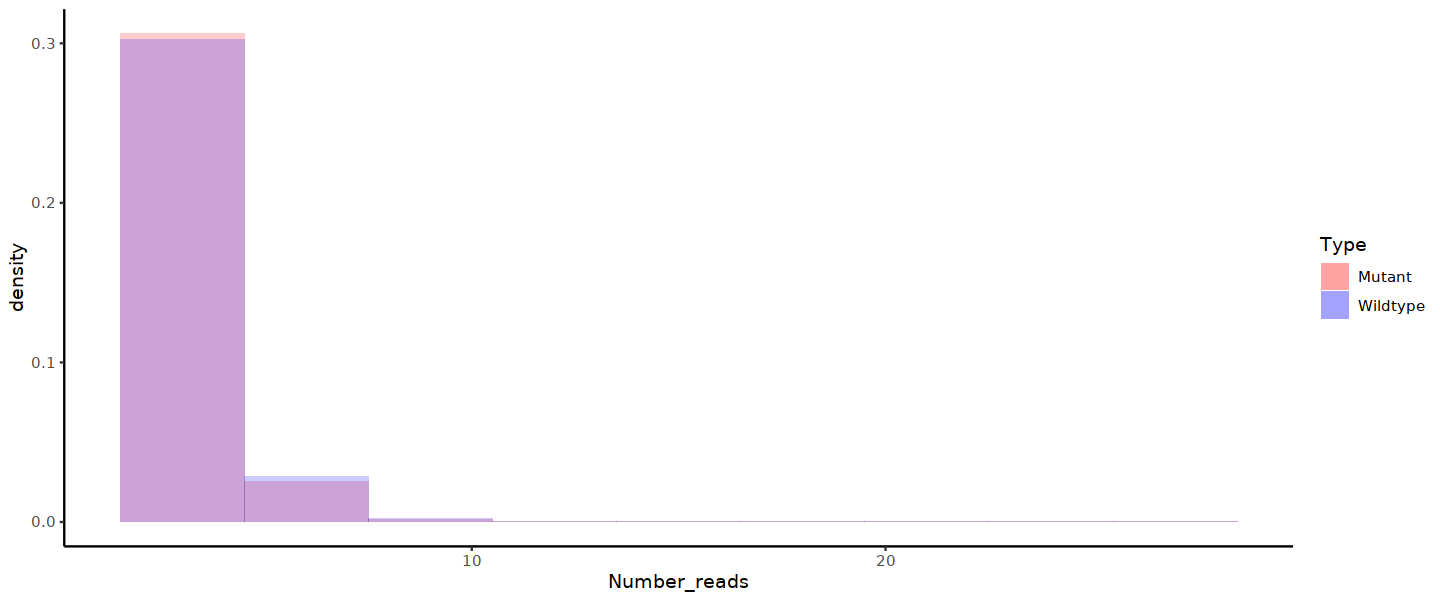

In [32]:
gRNA_UMI_variant$Type[index] <- 'False'
gRNA_UMI_variant$Type[-index] <- 'True'

Freq = table(gRNA_UMI_variant$Type)
Freq[1] / (Freq[1] + Freq[2]) * 100
Freq[2] / (Freq[1] + Freq[2]) * 100

print('Number of mutant UMI')
print(paste0('Processed cell number: ' ,length(unique(gRNA_UMI_variant$CB))))
print(paste0('Wildtype UMI: ', Freq[2]))
print(paste0('Mutant UMI: ', Freq[1]))
#table(gRNA_UMI_variant$Type)

Freq.df = as.data.frame(table(gRNA_UMI_variant$Type))
colnames(Freq.df) <- c('Type','Number')

value = Freq.df$Number/sum(Freq.df$Number)

pie = ggplot(Freq.df, aes(x="", y=Number, fill=Type)) + geom_bar(stat="identity", width=1, color = 'white')
pie = pie + coord_polar("y", start=0) + geom_text(aes(label = paste0(round(value*100, digit =2), "%")), 
                                              position = position_stack(vjust = 0.5))
# Remove labels and add title
pie = pie + labs(x = NULL, y = NULL, fill = NULL, title = "gRNA molecule")
# Add color scale (hex colors)
pie = pie + scale_fill_manual(values=c("royalblue", "navy")) 
# Tidy up the theme
pie = pie + theme_classic() + theme(axis.line = element_blank(),
      axis.text = element_blank(),
      axis.ticks = element_blank(),
      plot.title = element_text(hjust = 0.5, color = "#666666"))
print(pie)
p  <- ggplot(gRNA_UMI_variant, aes(x = Number_reads, fill = Type)) +
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'False'),],
               aes(x= Number_reads, y = ..density.. ), alpha = 0.2,binwidth = 3)+
geom_histogram(data = gRNA_UMI_variant[which(gRNA_UMI_variant$Type == 'True'),],
               aes(x= Number_reads, y = ..density..), alpha = 0.2,binwidth = 3)+theme_classic()+
scale_fill_manual(name="Type", values=c("red","blue"),labels=c("Mutant","Wildtype"))
print(p)
save_pdf <- paste0(output_dir,'.UMI_MT.pdf')
pdf(save_pdf, height = 8, width = 8)
print(pie)
print(p)
dev.off()


### MT.txt

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7) 
  770   684  1446     4     1     1     1   772   384    77    20    12     6 
 D(8)  D(9)     G  I(1)  I(2)  I(3)  I(4)  I(5)  I(6)  I(9)     T 
    2     4   771  2403  1248    77    12     2     1     1   605 
[1] "MT mutation type"

   D    I    S 
2730 3744 2830 
[1] "MT mutation structure"

gRNA Rest  TSO 
4248  601 4455 


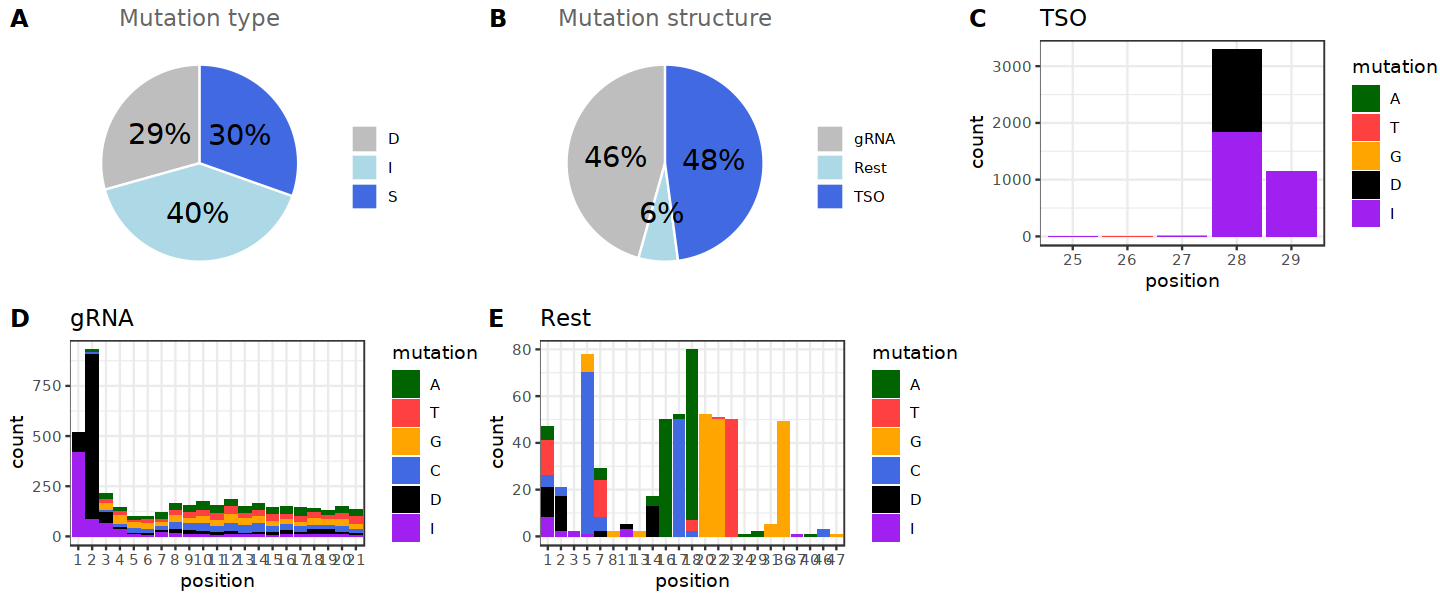

In [33]:
options(repr.plot.width = 12, repr.plot.height = 5)
MT <- plot_MT_pattern(input_dir, output_dir)

* Make beginning G of the protospacer 0 position
* All Rest staring from position 21
* U6/TSO as minus

In [34]:
Freq.df = as.data.frame(table(MT$`variant number`))
colnames(Freq.df) <- c('Type','Number')
summary(Freq.df$Number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.402   1.000  11.000 

Warning message:
“Removed 55 rows containing non-finite values (`stat_count()`).”


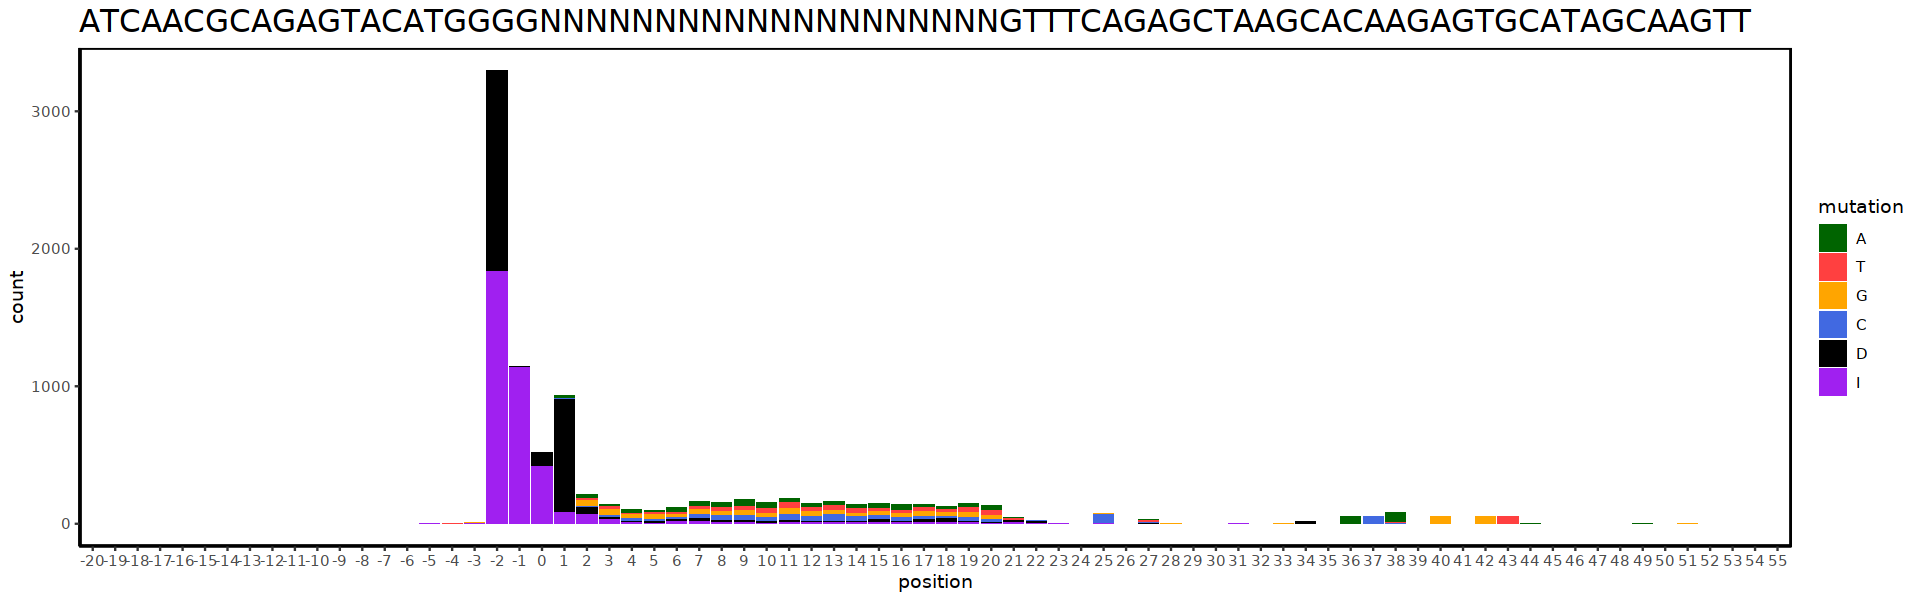

In [35]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20
MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))

options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')
#dev.off()

[1] 932

Warning message:
“Removed 46 rows containing non-finite values (`stat_count()`).”


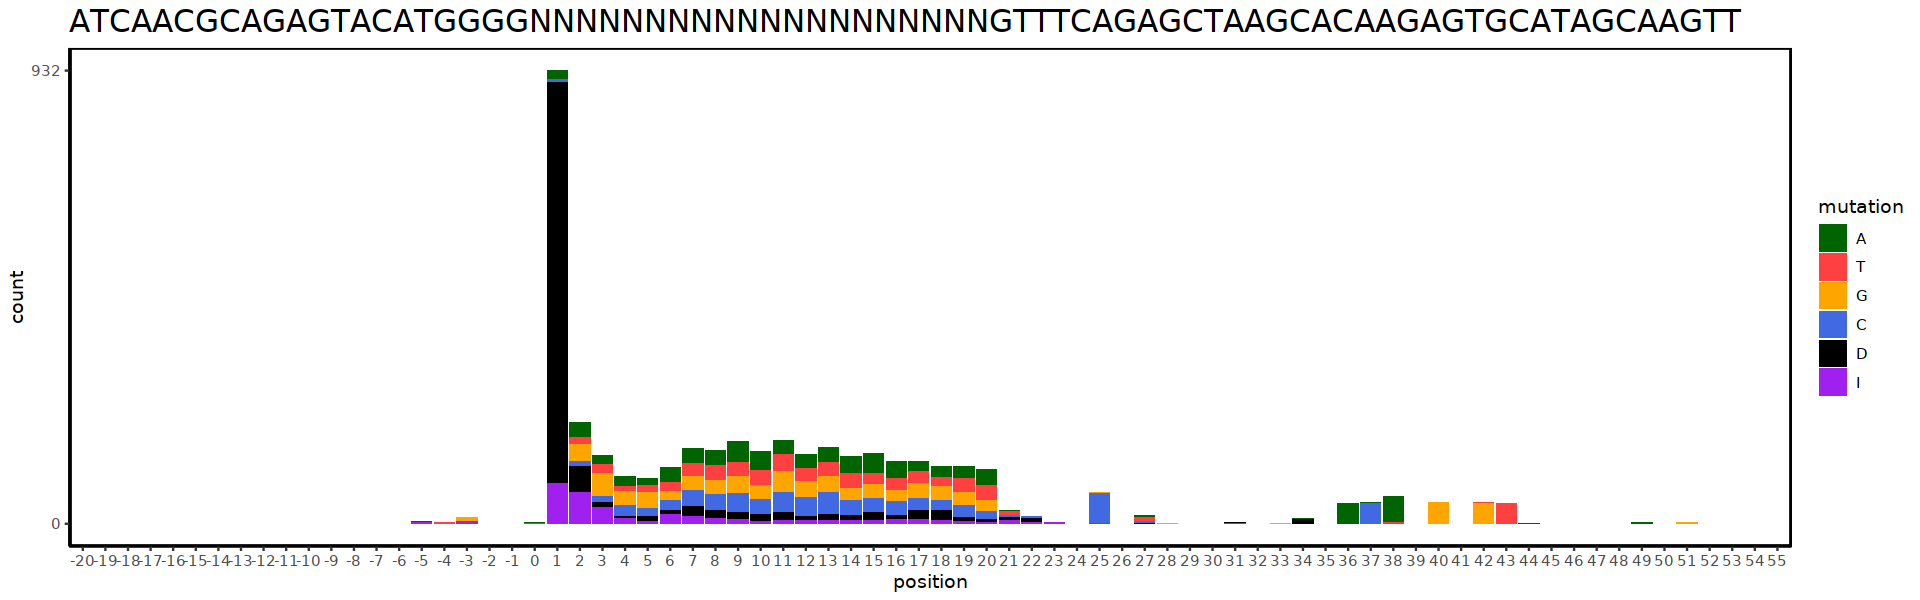

In [36]:
#save_pdf <- paste0(output_dir, '.all.MT_position_adjusted_TSO.pdf')
#pdf(save_pdf, width = 16, height = 5)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))


max(table(MT2$position))
options(repr.plot.width = 16, repr.plot.height = 5)
ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar(stat = 'count')+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')+
scale_y_continuous(breaks = c(0,max(table(MT2$position))))
#dev.off()

## Remove TSO artifacts for cell-gRNA assignment


Correct TSO in cells.gRNA.txt regionB

[1] "MT mutation table"

    A     C  D(1) D(10) D(11) D(12) D(13)  D(2)  D(3)  D(4)  D(5)  D(6)  D(7) 
  770   684  1446     4     1     1     1   772   384    77    20    12     6 
 D(8)  D(9)     G  I(1)  I(2)  I(3)  I(4)  I(5)  I(6)  I(9)     T 
    2     4   771  2403  1248    77    12     2     1     1   605 
[1] "MT mutation type"

   D    I    S 
2730 3744 2830 
[1] "MT mutation structure"

gRNA Rest  TSO 
4248  601 4455 


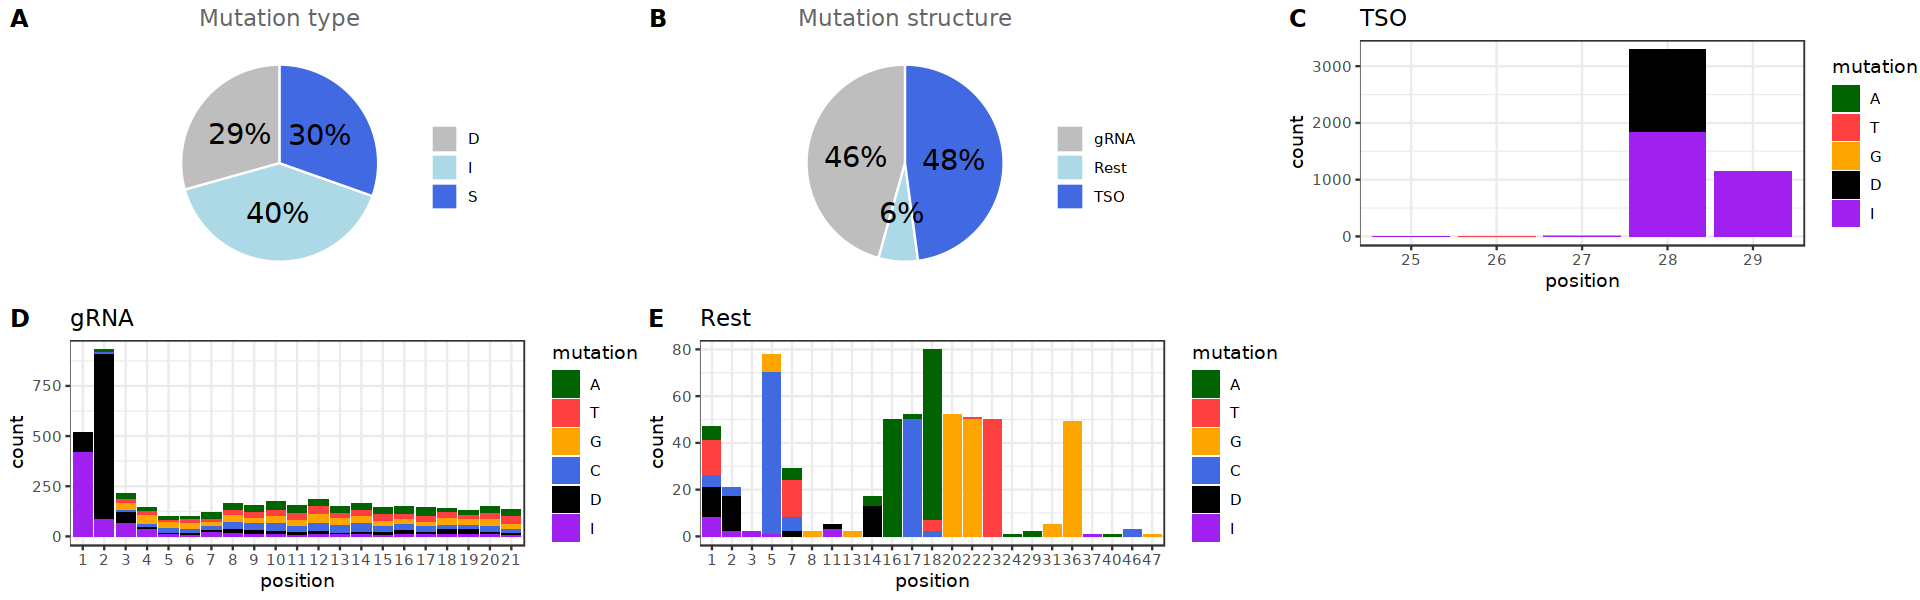

In [37]:
input_dir = './GiRAFR_outputs/Replogle_Cell/sample2/'
output_dir = './figures_results/Replogle_Cell/sample2'
MT <- plot_MT_pattern(input_dir, output_dir)
MT2 <- MT
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20

MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]

#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
MT2_nodedup <- MT2
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########

MT2$position <- factor(MT2$position, levels = seq(-20,55, by =1))

In [38]:
#dim(MT2) # presumed real mutant sgRNAs after removal of TSO artifacts without dedup
MT2_list_nodedup <- unique(MT2_nodedup$`variant number`)
length(MT2_list_nodedup)

[1] 1966

In [39]:
cells_gRNA_file <- paste0(input_dir, '/cells.gRNA.txt')
n_col = max(count.fields(cells_gRNA_file, sep = "\t"))
cells.gRNA <- read.table(cells_gRNA_file, 
                     header = FALSE, fill = TRUE, stringsAsFactors = FALSE,col.names =1:n_col)

colnames(cells.gRNA)[1:7]= c('cb','feature_order','target','WT','num_UMI_WT', 'MT','num_UMI_MT')
cells.gRNA$cb <- paste0(cells.gRNA$cb,'-1')
cells.gRNA.ori <- cells.gRNA

In [41]:
cells.gRNA <- cells.gRNA.ori
cells.gRNA.WTcounts <- cells.gRNA[,1:5]
for(i in seq(6,n_col-2,2)){
    MT.df <- cells.gRNA[,i:(i+1)]
    colnames(MT.df) <- c('MT','num_UMI_MT')
    MT.notInlist <- MT.df[!MT.df$MT %in% MT2_list_nodedup,]
    index <- !MT.df$MT %in% MT2_list_nodedup
    MT.notInlist$num_UMI_MT[is.na(MT.notInlist$num_UMI_MT)] <- 0
    cells.gRNA.WTcounts$num_UMI_WT[index] <- cells.gRNA.WTcounts$num_UMI_WT[index] + MT.notInlist$num_UMI_MT
    cells.gRNA[index,i:(i+1)] <- NA # make MT not in list as NA
}
cells.gRNA[,1:5] <- cells.gRNA.WTcounts
for(i in seq(1, nrow(cells.gRNA))){
    num_MT <- (sum(!is.na(cells.gRNA[i,])) - 5)/2 #updated number of gRNA
    if(cells.gRNA[i,5] > 0){
        cells.gRNA$feature_order[i] <- num_MT + 1
    }else{
        cells.gRNA$feature_order[i] <- num_MT
    }
}
# now feature order is no longer accumulated 
cells.num_features <- cells.gRNA %>% group_by(cb) %>% summarise(num_features = sum(feature_order))
#cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(is_MT))
cells.has_MT <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0)) %>% summarise(has_MT=any(contain_MT, is_MT))

# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


In [42]:
table(cells.num_features$num_features)
sum(table(cells.num_features$num_features))


   1    2    3    4    5    6    7    8 
6048 2407  668  242   64   31   12    3 

[1] 9475

In [45]:
sum(table(cells.num_features$num_features)[3:8])

[1] 1020

In [46]:
sum(cells.num_features$num_features) # cells (actual cells, count multiplets multiple times)
tmp <- cells.gRNA %>% group_by(cb) %>% summarise(contain_MT = (feature_order > 1), is_MT = (num_UMI_WT == 0))
# contain_MT, is_MT
# False, False -> wildtype
# True, False -> contain mutant gRNA also WT
# False, True -> single MT gRNA
# True, True -> multiple MT gRNA
sum(cells.gRNA[which(cells.gRNA$num_UMI_WT > 0),'feature_order']-1) + sum(cells.gRNA[which(cells.gRNA$num_UMI_WT == 0),'feature_order'])
# cells with mutations (multiplets count as multiple)c

[1] 14448

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'cb'. You can override using the `.groups`
argument.


[1] 3718

In [47]:
cells.gRNA_B <- cells.gRNA
cells.num_features_B <- cells.num_features
cells.has_MT_B <- cells.has_MT


In [48]:
sum(cells.has_MT_B$has_MT)
sum(cells.has_MT_B[which(cells.has_MT_B$cb %in% cells.num_features_B[which(cells.num_features_B$num_features == 1),]$cb),]$has_MT)


[1] 2663

[1] 122

In [49]:
length(unique(cells.gRNA_B[which(cells.gRNA_B$feature_order > 1 & cells.gRNA_B$num_UMI_WT > 0),'cb']))
# contain both WT and MT of the same gRNA


[1] 2099

Rows: 12659 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


png 
  2

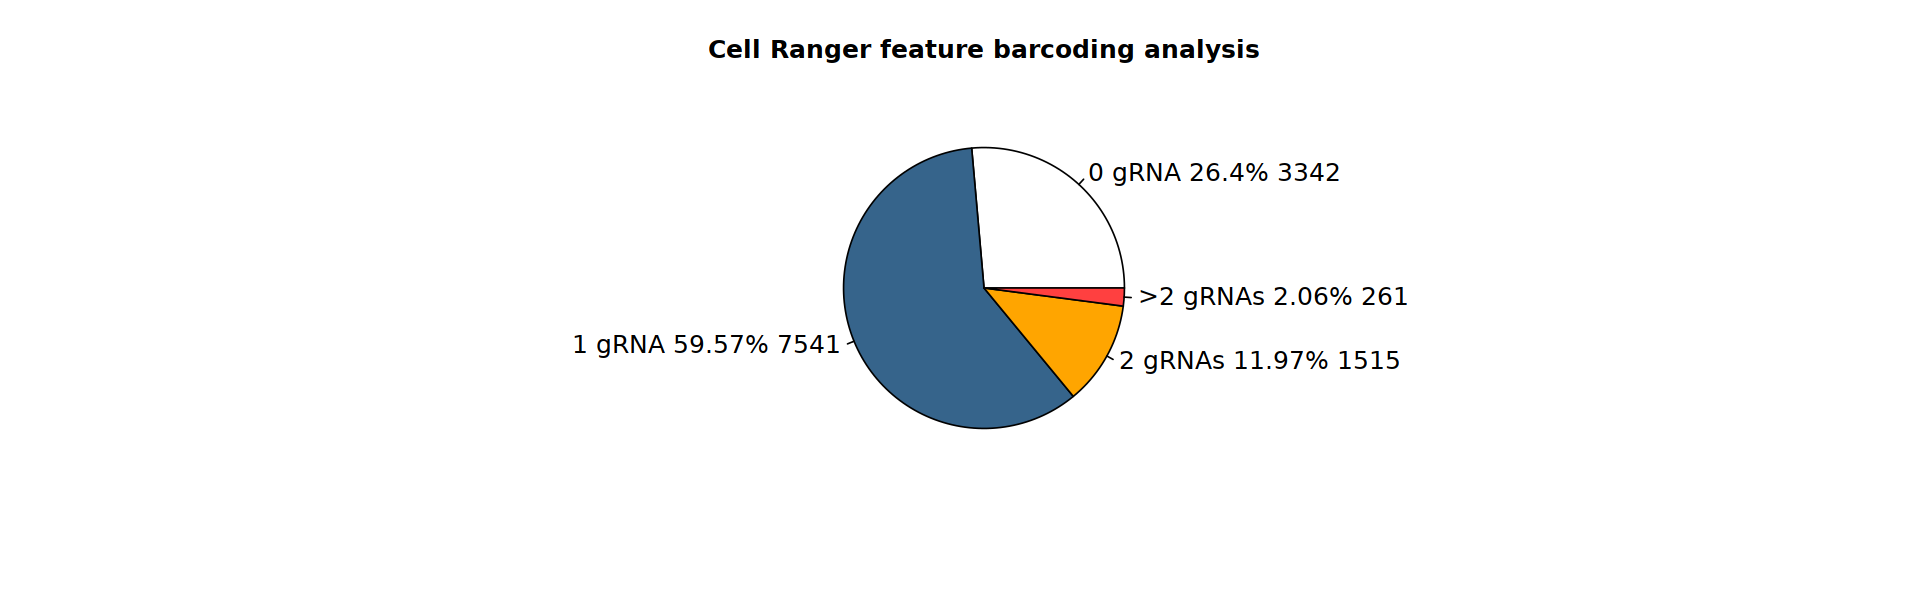

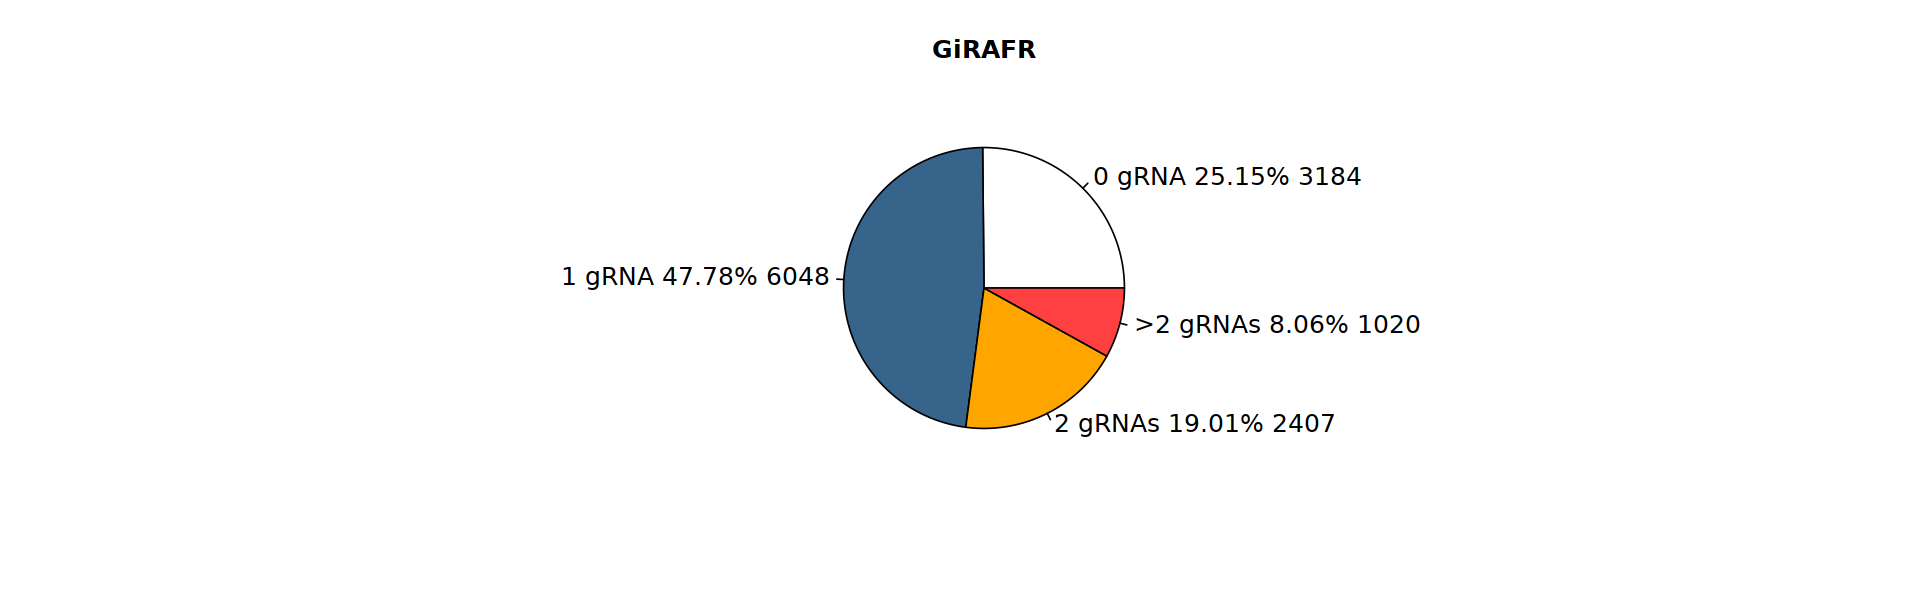

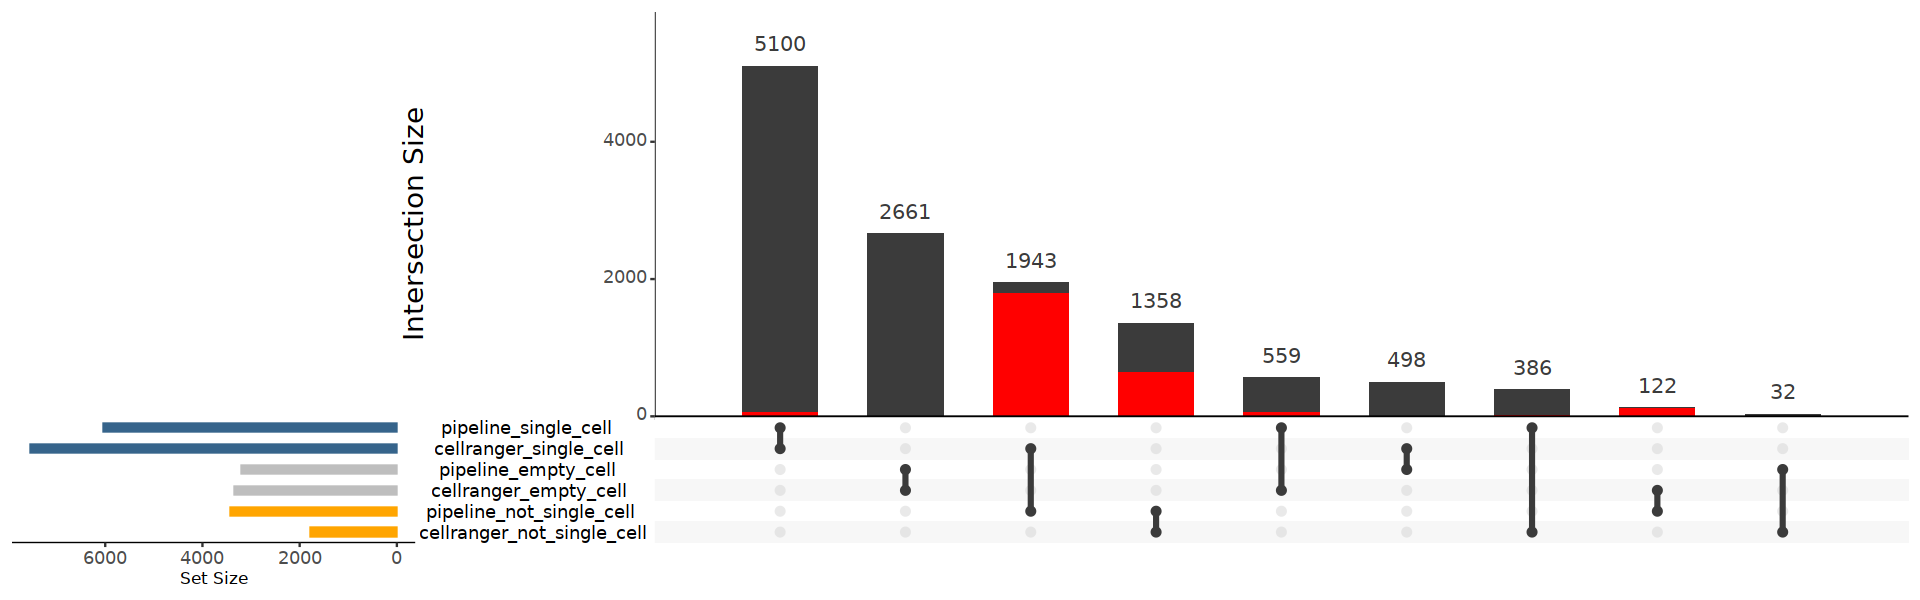

In [50]:
protospacer_file <- '/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/regionB/outs/crispr_analysis/protospacer_calls_per_cell.csv'
barcodes_file <- "/lustre1/project/stg_00064/projects/cropseq/267genes/develop/public_data/Replogle_Cell//feature_barcoding_analysis/regionB/outs/filtered_feature_bc_matrix/barcodes.tsv.gz"
protospacer_calls_per_cell <-read.csv(protospacer_file, stringsAsFactors = FALSE)
cellranger_barcode <- read_csv(barcodes_file, col_names = FALSE)
save_pdf <- paste0(output_dir, '.compare_cell_number_TSO.pdf')
pdf(save_pdf, height = 8, width = 10)

pipeline_NotEmpty <- cells.num_features$cb
pipeline_Single <- cells.num_features$cb[which(cells.num_features$num_features == 1)]
par(mar = c(1,1,1,10))
slices1 <- c(nrow(cellranger_barcode) - sum(table(protospacer_calls_per_cell$num_features)),
        as.vector(table(protospacer_calls_per_cell$num_features)[1]),
        as.vector(table(protospacer_calls_per_cell$num_features)[2]),
        sum(table(protospacer_calls_per_cell$num_features)[-(1:2)]))
lbls1 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct1 <- round(slices1/sum(slices1)*100, digit =2 )
lbls1 <- paste(lbls1, pct1) # add percents to labels
lbls1 <- paste(lbls1,"%",sep="") # ad % to labels
lbls1 <- paste(lbls1, slices1, sep =' ')
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')

par(mar = c(5,1,1,10))
slices2 <- c(nrow(cellranger_barcode) - sum(table(cells.num_features$num_features)),
        as.vector(table(cells.num_features$num_features)[1]),
        as.vector(table(cells.num_features$num_features)[2]),
        sum(table(cells.num_features$num_features)[-(1:2)]))
lbls2 <- c('0 gRNA','1 gRNA', '2 gRNAs', '>2 gRNAs')
pct2 <- round(slices2/sum(slices2)*100, digit = 2)
lbls2 <- paste(lbls2, pct2) # add percents to labels
lbls2 <- paste(lbls2,"%",sep="") # ad % to labels
lbls2 <- paste(lbls2, slices2, sep =' ')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')

all_barcodes <- as.data.frame(cellranger_barcode)
all_barcodes$pipeline_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 1, 0)
all_barcodes$pipeline_empty_cell <- ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 0, 1)
all_barcodes$pipeline_not_single_cell <- ifelse(all_barcodes$X1 %in% pipeline_Single, 0, 
                                            ifelse(all_barcodes$X1 %in% pipeline_NotEmpty, 1, 0))

all_barcodes$cellranger_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 1, 0)
all_barcodes$cellranger_empty_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 0, 1)
all_barcodes$cellranger_not_single_cell <- ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode[protospacer_calls_per_cell$num_features == 1], 0, 
                                            ifelse(all_barcodes$X1 %in% protospacer_calls_per_cell$cell_barcode, 1, 0))
all_barcodes <- merge(all_barcodes, cells.has_MT, by.x = 'X1', by.y = 'cb', all.x = TRUE)

#table(all_barcodes$pipeline_single_cell, all_barcodes$has_MT)
#table(all_barcodes$has_MT)

Myfunc <- function(row) {data <- (row["has_MT"] == TRUE)}
p <- upset(data = all_barcodes, 
      queries = list(list(query = Myfunc, color = "red", active = T)),
      sets = c('cellranger_not_single_cell','pipeline_not_single_cell',
           'cellranger_empty_cell','pipeline_empty_cell',
           'cellranger_single_cell','pipeline_single_cell'), order.by = "freq",keep.order = TRUE,sets.bar.color=c("orange","orange","grey","grey","steelblue4","steelblue4"), 
      point.size =2.5,line.size = 1.3,text.scale = c(2, 1.5, 1.2, 1.5, 1.5, 2))
print(p)
dev.off()
pie(slices1, labels = lbls1, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"), 
    main = 'Cell Ranger feature barcoding analysis')
pie(slices2, labels = lbls2, cex = 1.2,radius = 0.8, col = c("white","steelblue4","orange","brown1"),
   main = 'GiRAFR')
p

In [51]:
table(all_barcodes[which(all_barcodes$cellranger_empty_cell == 1),'has_MT'])


FALSE  TRUE 
  518   163 

# combine samples MT position

Warning message:
“Removed 174 rows containing non-finite values (`stat_count()`).”
Warning message:
“Removed 174 rows containing non-finite values (`stat_count()`).”


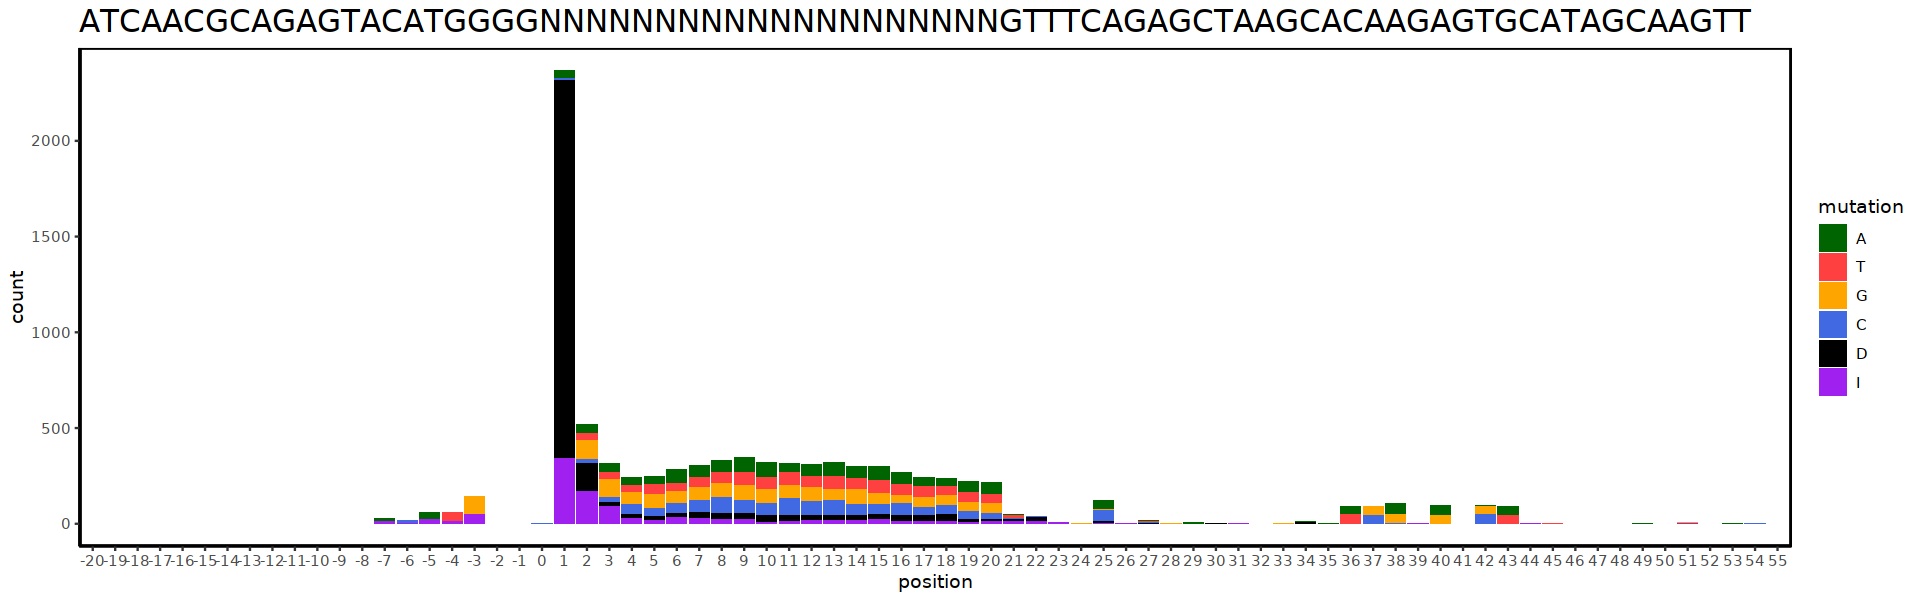

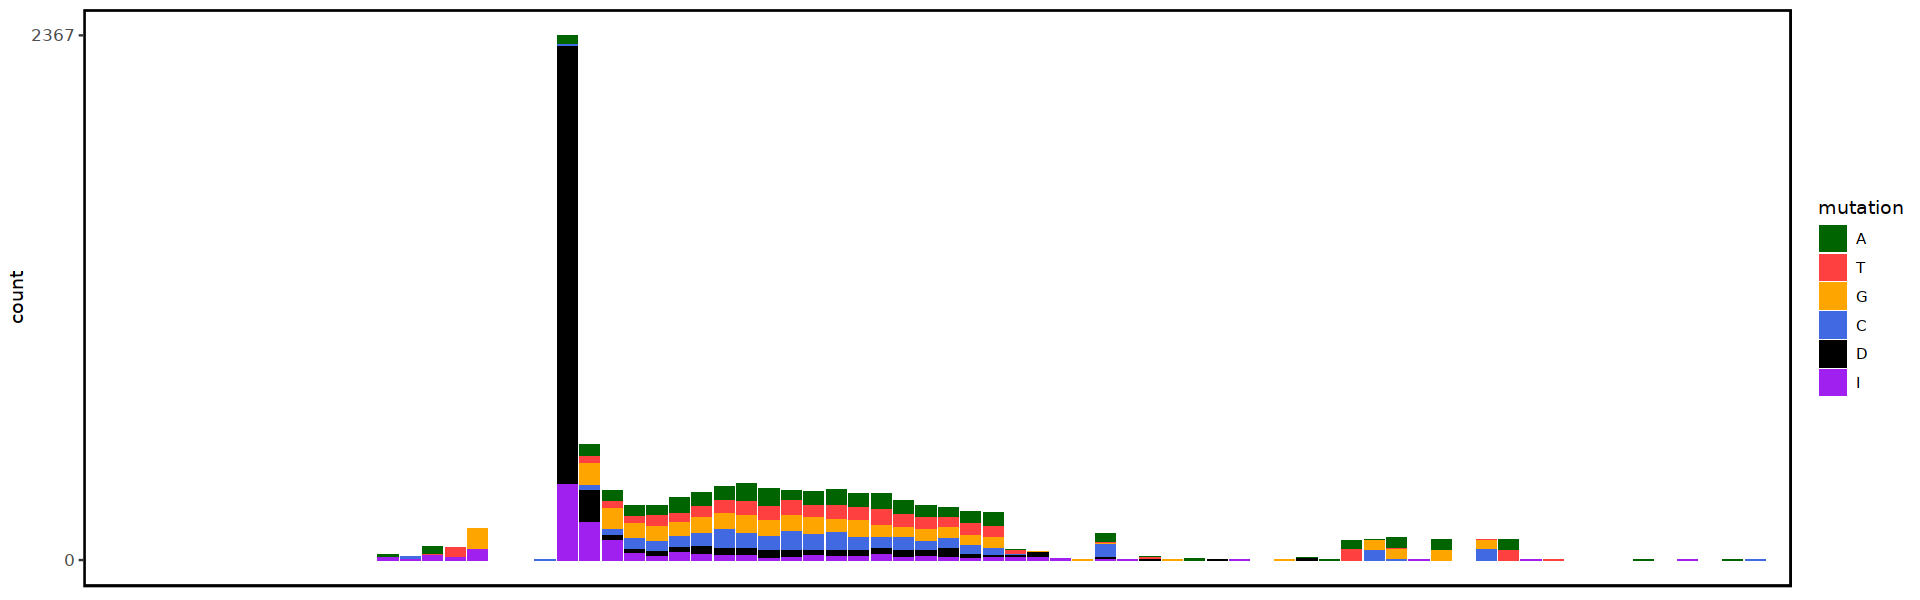

In [52]:
rm(list = ls())
my_colors <- c("D" = 'black', 'I' = 'purple', 
               'A' = 'darkgreen', 'T' = 'brown1', 
               'G' = 'orange', 'C'= 'royalblue')

input_dir = './GiRAFR_outputs/Replogle_Cell/sample1/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample1 <- read.table(MT_file, header = FALSE)
colnames(MT_sample1) <- c('gene name','structure','structure length', 'position','mutation','variant number')

input_dir = './GiRAFR_outputs/Replogle_Cell/sample2/'
MT_file <- paste0(input_dir, '/all.MT.txt')
MT_sample2 <- read.table(MT_file, header = FALSE)
colnames(MT_sample2) <- c('gene name','structure','structure length', 'position','mutation','variant number')

#save_pdf <- paste0('./figures_results/Replogle_Cell/', 'Combined.all.MT_position_adjusted.pdf')
#pdf(save_pdf, width = 16, height = 5)

MT2 <- rbind(MT_sample1, MT_sample2)
MT2[which(MT2$structure == 'TSO'), 'position'] <- MT2[which(MT2$structure == 'TSO'), 'position']-30
MT2[which(MT2$structure == 'gRNA'), 'position'] <- MT2[which(MT2$structure == 'gRNA'), 'position'] - 1
MT2[which(MT2$structure == 'Rest'),'position'] <- MT2[which(MT2$structure == 'Rest'),'position']+20


MT2$mutation2 <- MT2$mutation
MT2$mutation2[grepl('D', MT2$mutation2)] <- 'D' 
MT2$mutation2[grepl('I', MT2$mutation2)] <- 'I'
MT2$mutation2 <- factor(MT2$mutation2, levels = c('A','T','G','C','D','I'))
MT2 <- MT2[-which(MT2$position %in% c(-1, -2,0) & MT2$mutation2 %in% c('I','D')),]
#########
MT2$dedup <- paste0(MT2$`gene name`, MT2$structure, MT2$`structure length`, MT2$position, MT2$mutation)
tmp <- MT2 %>% group_by(`variant number`) %>% summarise(mutations = list(dedup))
MT2 <- MT2[which(!MT2$`variant number` %in% tmp$`variant number`[duplicated(tmp$mutations)]),]
rm(tmp)
#########
MT2$position <- factor(MT2$position, levels = seq(-20, 55, by =1))


ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme( panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      plot.title = element_text(size = 18))+scale_x_discrete(limits = levels(MT2$position))+
ggtitle(label = 'ATCAACGCAGAGTACATGGGGNNNNNNNNNNNNNNNNNNNNGTTTCAGAGCTAAGCACAAGAGTGCATAGCAAGTT')

ggplot(MT2, 
       aes(x = as.factor(position), fill = mutation2)) + geom_bar()+
scale_fill_manual("mutation", values = my_colors)+xlab('position') +theme_classic() +
theme(panel.border =element_rect(colour = 'black', fill = NA, size = 1), 
      axis.title.x=element_blank(),
      axis.line=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      axis.text.y = element_text(size=10),
      plot.title = element_text(size = 18))+
scale_x_discrete(limits = levels(MT2$position))+scale_y_continuous(breaks = c(0,max(table(MT2$position))))
#dev.off()

In [53]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.7 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/334/vsc33470/miniconda3/envs/SeuratV5/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] readr_2.1.4             dplyr_1.1.2             tidyr_1.3.0            
[4] ggpubr_0.6.0            Seurat_4.9.9.9042       SeuratObject_4.9.9.9084
[7] sp_1.6-0                UpSetR_1.4.0            ggplot2_3.4.2          

loaded via a namespace (and no